# Fundamentals of Data Science
Winter Semester 2020

## Prof. Fabio Galasso, Alessandro Flaborea and Luca Franco

## Exercise 2

In Exercise 2, you will re-derive and implement logistic regression and optimize the parameters with Gradient Descent and with the Newton's method. Also, in this exercise you will re-derive and implement Gassian Discriminant Analysis.
We will use the files logistic_x.txt and logistic_y.txt. The first contains the feature values $x^{(i)}_1$ and $x^{(i)}_2$ for the $i$-th data sample $x^{(i)}$. The second contains the ground truth label $y^{(i)}$ for each corresponding data sample.

Note that, differently from what seen in lecture, $y^{(i)}\in \{-1,1\}$.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.
Submit it by sending an email to galasso@di.uniroma1.it, flaborea.1841969@studenti.uniroma1.it and franco.luca.17@gmail.com by Wednesday November 25th, 23:59.

## Notation

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

Let's start by setting up our Python environment and importing the required libraries:


## [15 points] Question 1: Logistic Regression with Gradient Ascent

### (a) [5 points] Equations for the log likelihood, its gradient, and the gradient ascent update rule.

Write and simplify the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

Question: in order to learn the optimal $\theta$, do you need to minimize or to maximize $l(\theta)$?

################# Do not write above this line #################

__Likelihood $L(\theta)$__: <br>
We start from the assumption <hr>
<center> $y^{(i)} = h_\theta(x)+\epsilon^{(i)}$ </center>. <br>
$\alpha(\theta)$ by definition is  $P(y| x; \theta)$; since we assumed the $\epsilon^{(i)}$ independent identically distribuited we get <hr>
<center>$\prod_{i=1}^m P(y^{(i)}| x^{(i)}; \theta)$ </center>

In general we can write $P(y| x; \theta) = h_{\theta}(x)^{\frac{1+y}{2}}(1-h_{\theta}(x))^{\frac{1-y}{2}}$, so we have <hr>

<center>$\prod_{i=1}^m h_{\theta}(x^{(i)})^{\frac{1+y^{(i)}}{2}}(1-h_{\theta}(x^{(i)})^{\frac{1-y^{(i)}}{2}}$ </center> <hr>

We can explicitely write its formulation given $h_\theta(x) = g(\Theta^Tx) = \frac{1}{1+e^{-\Theta^{T}x}}$ : <hr>

<center> $\prod_{i=1}^m \left(\frac{1}{1+e^{-\Theta^Tx^{(i)}}}\right)^{\frac{y^{(i)}+1}{2}}\left(1-\frac{1}{1+e^{\Theta^Tx^{(i)}}}\right)^{\frac{{1-y^{(i)}}}{2}}$ </center>



__log-likelihood $l(\theta)$__ :<br>
To compute $log \alpha(\theta) = l(\theta)$ we use the properties of the logarithm and we obtain
<center> $ \sum_{i=1}^m\frac{y^{(i)}+1}{2} log \left(h_\theta(x^{(i)})\right) + \frac{{1-y^{(i)}}}{2} log\left(1-h_\theta(x^{(i)})\right)$. </center>

Its explicit formulation is 

<center> $\sum_{i=1}^m \frac{y^{(i)}+1}{2}log\left(\frac{1}{1+e^{-\Theta^Tx^{(i)}}}\right) + \frac{{1-y^{(i)}}}{2} log \left(1-\frac{1}{1+e^{\Theta^Tx^{(i)}}}\right)$ </center>




__Hypothesis Function__:<br>
In a first moment we saw the hypothesis function in the continuous case with linear regression, so $h_\theta(x)$ could assume value outside the range $(0,1)$. In logistic regression, the target values are in a discrete set, in our specific case they can assume value -1 or 1. For this reason we need an hypothesis such that $h_\theta(x) \in [0,1]$. For this reason we use the _logistic function g_ : $g(z)=\frac{1}{1+e^{-z}}$, in particular we compute $g(\Theta^Tx)$ and this is our hypothesis function in the case of two classes that in our case will be -1 and 1.
<center> $h_\theta(x)= \frac{1}{1+e^{-\Theta^Tx}}$ </center> <hr>
We can interpret the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ as the estimated probability that $y=1$ on the input $\vec{x}$. <br>
Since that, by the law of total probability, we have 
<center> $P(y=1|x;\theta)+P(y=-1|x;\theta)=1$.</center>
We predict $y=1$ if $h_\theta(x)$ is above a certain treshold and $y=-1$ otherwise.

__Gradient of $log(\theta)$__: <br>
Since $log(\theta)$ is a concave function we try to converge to its maximum using the _gradient ascent_ algorithm, where the update equation is:
<center> $\theta_j := \theta_j + \alpha \frac{\delta l(\theta)}{\delta \theta_j}$ </center> 
With the derivative computed we have :
<center> $\theta_j := \theta_j + \alpha \sum_{i=1}^m \frac{x_j^{(i)}}{2}\left(y^{(i)}+1-h_\theta(x^{(i)}\right)$ </center> 


__Question__: <br>
We need to maximize $l(\theta)$ since it is a concave function and for this reason we use the gradient ascent.

################# Do not write below this line #################

### (b) [10 points] Implementation of logistic regression with Gradient Ascent

Code up the equations above to learn the logistic regression parameters. Consider as data the files logistic_x.txt and logistic_y.txt. The first contains the feature values $x^{(i)}_1$ and $x^{(i)}_2$ for the $i$-th data sample $x^{(i)}$. The second contains the ground truth label $y^{(i)}$ for each corresponding data sample.

In [ ]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
import math
# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

Let's start by loading the data into two pandas DataFrames:

In [ ]:
df_x = pd.read_csv("logistic_x.txt", sep="\ +", names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('logistic_y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)
df_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [ ]:
df_y.head()

,y
0,-1
1,-1
2,-1
3,-1
4,-1


Let's get the NumPy arrays from the dataset, and add a column of 1's to $X$ to take into account the zero intercept

In [ ]:
x = np.hstack([np.ones((df_x.shape[0], 1)), df_x[["x1","x2"]].values])
y = df_y["y"].values

Adjust y so that $y^{(i)}\in [0,1]$

################# Do not write above this line #################

Your code here

In [ ]:
for i in range(len(y)):
    if y[i]==-1:
        y[i]=0


################# Do not write below this line #################

In [ ]:
[x[:5,:],x[-5:,:]] # Plot the first and last 5 lines of x, now containing features x0 (constant=1), x1 and x2

[array([[ 1.        ,  1.3432504 , -1.3311479 ],
        [ 1.        ,  1.8205529 , -0.6346681 ],
        [ 1.        ,  0.98632067, -1.8885762 ],
        [ 1.        ,  1.9443734 , -1.635452  ],
        [ 1.        ,  0.97673352, -1.3533151 ]]),
 array([[ 1.        ,  4.7748538 ,  0.09941521],
        [ 1.        ,  5.8274854 , -0.69005848],
        [ 1.        ,  2.2894737 ,  1.9707602 ],
        [ 1.        ,  2.494152  ,  1.4152047 ],
        [ 1.        ,  2.0847953 ,  1.3567251 ]])]

In [ ]:
[y[:5],y[-5:]] # Plot the first and last 5 lines of y

[array([0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1])]

Define the sigmoid function "sigmoid", the function to compute the gradient of the log likelihood  "grad_l" and the gradient ascent algorithm.

################# Do not write above this line #################

Your code here

In [ ]:
def sigmoid(x):
    g = 1 / (1 + np.exp(-x))
    return g

def log_likelihood(theta, x, y):
    m = x.shape[0]
    arg = np.dot(x, theta)  
    log_l = np.sum(y * np.log(sigmoid(arg)) + (1-y)*np.log(1-sigmoid(arg)))/ m
    return log_l # return the log likehood of theta according to data x and label y
    

def grad_l(theta, x, y):
    m = x.shape[0]
    arg = np.dot(x, theta) 
    G = (1 / m) * np.dot(y-sigmoid(arg) , x)
    return G # return the gradient G of the log likelihood
 

def gradient_ascent(theta, x, y, G, alpha=0.01, iterations=100):
    
    log_l_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,len(x[0])))
    m = x.shape[0]
    for i in range(iterations):
        theta = theta + (alpha * grad_l(theta, x, y))
        theta_history[i,:] = theta
        log_l_history[i] = log_likelihood(theta,x,y)       
        
        
    return theta, log_l_history, theta_history

################# Do not write below this line #################

Check your grad_l implementation:
grad_l applied to the theta_test (defined below) should provide a value for log_l_test close to the target_value (defined below); in other words the error_test should be 0, up to machine error precision.

In [ ]:
target_value = -0.4250958770469834
theta_test = np.array([-2,1,2])
log_l_test  = log_likelihood(theta_test,x,y)
error_test=np.abs(log_l_test-target_value)

print("{:f}".format(error_test))

0.000000


Let's now apply the function gradient_ascent and print the final theta as well as theta_history 

In [ ]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Gradient Ascent method
n_iter=1000
theta_final, log_l_history, theta_history = gradient_ascent(theta0,x,y,grad_l,alpha=0.5,iterations=n_iter)
#n_iter=100
#theta_final, log_l_history, theta_history = gradient_ascent(theta0,x,y,grad_l,alpha=25,iterations=n_iter)
print(theta_final)
print(theta_history)

[-2.62008936  0.76027868  1.1719157 ]
[[-2.52525253e-03  2.40752765e-01  2.77415313e-01]
 [-9.46624841e-02  2.41740896e-02  4.84262297e-01]
 [-7.91257819e-02  2.89805031e-01  5.87796492e-01]
 ...
 [-2.62008225e+00  7.60277115e-01  1.17191517e+00]
 [-2.62008582e+00  7.60277900e-01  1.17191543e+00]
 [-2.62008936e+00  7.60278679e-01  1.17191570e+00]]


Let's plot the log likelihood over iterations

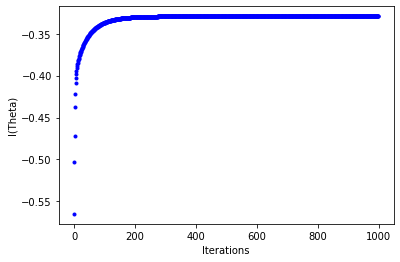

In [ ]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

Plot the data and the decision boundary:

In [ ]:
df_x_pl=df_x.copy()
df_y_pl=df_y.copy()
df_x_pl.insert(0, "y", df_y)
df_x_pl["y"] = pd.to_numeric(df_x_pl["y"], downcast='signed')
df_x_pl.head()

,y,x1,x2
0,0,1.343250,-1.331148
1,0,1.820553,-0.634668
2,0,0.986321,-1.888576
3,0,1.944373,-1.635452
4,0,0.976734,-1.353315


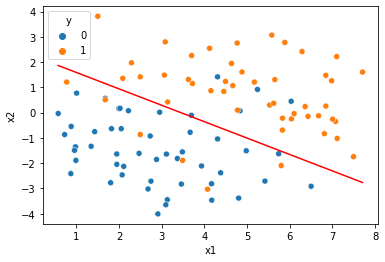

In [ ]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

# Save the theta_final value for later comparisons
theta_GA = theta_final.copy()

################# Do not write above this line #################

Write now your considerations. Discuss in particular:
- what effects do the learning rate $\alpha$ and the number of iterations have on the computed $\theta$
- may you still achieve the same value if you decrease the learning rate $\alpha$ and increase the number of iterations n_iter up to an infinite number of them? Why?
- may you still achieve the same value if you increase the learning rate $\alpha$ substantially and decrease the number of iterations n_iter? Why?

Substantiate your answer with experiments and plots of the $l(\theta)$ and the decision boundary.

- If we have a very small learning rate $\alpha$, the gradient ascent could converge really slowly, on the other hand for high value of $\alpha$ the gradient of the log-likelihood may not decrease on every iteration or may even not converge. <br> <br>
We can see that setting $\alpha=0.001$, $l(\theta)$ reaches its maximum slower compared to $\alpha=0.5$ we had before. As the plot shows with this $\alpha$ the log-likelihood does not converge and the decision boundary does not make us good prediction.

In order to have a better performance we can increase the number of iterations from 1000 to 100000, so a better decision boundary and $l(\theta)$ now reaches value of 0.500 respect to the 0.688 we had before.

In the end we can raise the learning rate ($\alpha=2$) and see that, of course, $l(\theta)$ grows faster but it doesn't converge it continues to fluctuate.

- Assuming the fact that we can do infinite iterations, choosing every value $\alpha$ such that $\alpha>0$ we can have convergence. If we have a learning rate close to zero, the step in the gradient ascent toward the maxima will be really short, since we assumed infinite iterations at some point we will reach the maximum whatever the length of the step is.

may you still achieve the same value if you increase the learning rate  𝛼  substantially and decrease the number 
of iterations n_iter? Why?
- In the case of a large value for $\alpha$ the gradient ascent could not increase toward the maxima or even not converge, no matter the value of n_iter we choose : in the first step we could override the maxima and iteration after iteration get away from it.


As example we can consider $\alpha$ equal to 25 and show that we are not improving the value of $l(\theta)$ (n_iter = 100), instead it diverges.

################# Do not write below this line #################


## [15 points] Question 2: Logistic Regression with the Newton's method

### (a) [5 points] Equations for the Hessian of the log likelihood

Derive the equation for the Hessian matrix $H$ of the log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall that: $H_{i,j} = \frac{\delta^2 l(\theta)}{\delta \theta_i \delta \theta_j}$

Also write the parameter update rule for the Newton's method, as a function of the Hessian and gradient of $l(\theta)$.

Question: in order to learn the optimal $\theta$, do you need to minimize or to maximize $\nabla_{\theta} l$?

################# Do not write above this line #################

__Hessian matrix__: <br>
the Hessian matrix  $H$ of the log-likelihood  $l(\theta)$  represents the second derivative of $l$ and it is a $(n+1)\times(n+1)$ matrix and in our case $n=2$. Its formulation is:
<center> 
 $\begin{bmatrix}
\frac{\delta l^2}{\delta\theta_0^2} & \frac{\delta l^2}{\delta\theta_0\delta\theta_1} & \frac{\delta l^2}{\delta\theta_0\delta\theta_2} \\
\frac{\delta l^2}{\delta\theta_1\delta\theta_0}  & \frac{\delta l^2}{\delta\theta_1^2} & \frac{\delta l^2}{\delta\theta_1\delta\theta_2} \\
\frac{\delta l^2}{\delta\theta_2\delta\theta_0}  & \frac{\delta l^2}{\delta\theta_1\delta\theta_2}&  \frac{\delta l^2}{\delta\theta_2^2}
\end{bmatrix}$</center>

We can explicit the element of the matrix starting from the first derivative of the log likelihood, re-derive it by $\theta_i$ we get:
$\sum e^{-\theta^Tx}h_\theta^2(x^{(k)}) x_i^{(k)}x_j^{(k)}=
\sum \left(\frac{1}{h_\theta(x^{(k)})}-1\right)h_\theta^2(x^{(k)})$, then
<center>
$\dfrac{\partial^2 l}{\partial\theta_i\partial\theta_j} = -\sum_{k=1}^{m}{x_i^{(k)}x_j^{(k)}h_\theta(x^{(k)})(1-h_\theta(x^{(k)})})$ </center>

__Update rule for the Newton's method__: <br>
<center> $\theta^{(t+1)} := \theta^{(t)} - H^{-1} \nabla_\theta l(\theta)$ </center>

__Question__: <br>
we need to minimize  $\nabla_\theta l(\theta)$ in order to converge to the maximum of the concave function $l(\theta)$ .

################# Do not write below this line #################

### (b) [10 points] Implementation of logistic regression with the Newton's method

Code up the equations above to learn the logistic regression parameters. Consider as data the files logistic_x.txt and logistic_y.txt. The first contains the feature values  $x^{(i)}_1$ and $x^{(i)}_2$  for the  𝑖 -th data sample  $x^{(i)}$ . The second contains the ground truth label  $y^{(i)}$  for each corresponding data sample.

Define the Hessian function hess_l and the Newton's method function "newton":

################# Do not write above this line #################

$H_{i,j}=\dfrac{\partial^2 l}{\partial\theta_i\partial\theta_j} = -\sum_{k=1}^{m}{x_i^{(k)}x_j^{(k)}h_\theta(x^{(k)})(1-h_\theta(x^{(k)})})$ </center>

Your code here

In [ ]:
def hess_l(theta, x, y):
    m=x.shape[0] 
    z = np.dot(x, theta)
    p = sigmoid(z)
    W = np.diag(p * (1 - p))
    hessian = x.T.dot(W).dot(x)

    return -hessian/m# return the Hessian matrix hess
   

def newton(theta0, x, y, G, H, eps):
    theta_history = np.array([theta0])  
    log_l_history = np.array (log_likelihood(theta0, x, y))
    while (np.linalg.norm(grad_l(theta0,x,y)) >= eps): 
        theta0 = theta0 - np.dot(np.linalg.inv(hess_l(theta0,x,y)),  grad_l(theta0, x , y)) 
        theta_history = np.append(theta_history,[theta0], axis=0)
        log_l_history = np.append(log_l_history, log_likelihood(theta0, x, y)) 
    
    # return the optimized theta parameters, as well as two lists containing the log likelihood's and values of theta at all iterations
    return theta0, theta_history, log_l_history

################# Do not write below this line #################

Check your hess_l implementation: hess_l applied to the theta_test (defined below) should provide a value for hess_l_test close to the target_value (defined below); in other words the error_test should be 0, up to machine error precision.

In [ ]:
target_value = np.array([[-0.14357024, -0.43836134,  0.18767787], \
                         [-0.43836134, -1.72295801,  0.61817001], \
                         [ 0.18767787,  0.61817001, -0.51247901]])
theta_test=np.array([-2,1,2])

hess_l_test  = hess_l(theta_test,x,y)
error_test=np.sum(np.abs(hess_l_test-target_value),axis=(0,1))

print("{:f}".format(error_test))

2.879550


Now run Newton's method to perform logistic regression:

In [ ]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])
# Run Newton's method
theta_final, theta_history, log_l_history = newton(theta0,x,y,grad_l,hess_l,1e-6)
print(theta_final)

[-2.62050954  0.76037096  1.17194549]


Let's plot the log likelihood over iterations

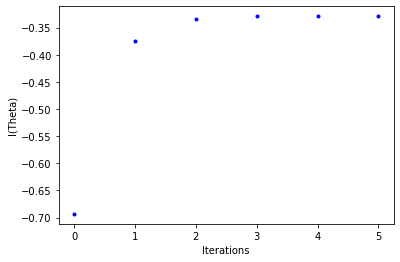

In [ ]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')


Plot the data and our decision boundary:

In [ ]:
df_x_pl=df_x.copy()
df_y_pl=df_y.copy()
df_x_pl.insert(0, "y", df_y)
df_x_pl["y"] = pd.to_numeric(df_x_pl["y"],downcast='signed')
df_x_pl.head()

,y,x1,x2
0,0,1.343250,-1.331148
1,0,1.820553,-0.634668
2,0,0.986321,-1.888576
3,0,1.944373,-1.635452
4,0,0.976734,-1.353315


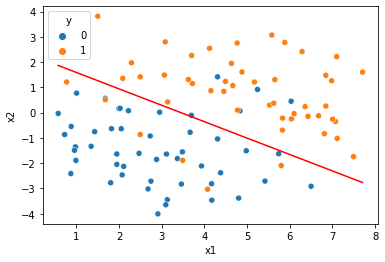

In [ ]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

################# Do not write above this line #################

Write now your considerations. Discuss in particular:
- the different convergence speed of the Newton's method, compared to Gradient Ascent
- the incurred cost for the different convergence speed

- Newton's method is way faster than the Gradient Ascent, in particular it has a quadratic convergence, so we converge to the minimum with way less iterations.

- Even if the Newton's method converges faster there's a catch, in fact it has higher complexity respect Gradient Ascent due to the fact that we have to compute the inverse of the hessian matrix H which is a (n+1)x(n+1) matrix, where n represents the number of features. This computation costs $\theta(n^3)$ and in order of millions features this algorithm is no longer convenient and we prefer to use the Gradient Ascent. In our case we have a very low value n so the Newton's method have the best performance.

################# Do not write below this line #################


## [7 points] Question 3: Logistic Regression with non linear boundaries

### (a) Polynomial features for logistic regression

Define new features, e.g. of 2nd and 3rd degrees, and learn a logistic regression classifier by using the new features, by using the Newton's optimization algorithm (or the gradient ascent one, if you like).

In particular, we would consider a polynomial boundary with equation:

$f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2$

We would therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking x (from the previous questions) and the new 7 features (in the order x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2). In particular create x_new_quad by additionally stacking with x the quadratic features, and x_new_cubic by additionally stacking with x the quadratic and the cubic features.

In [ ]:
# First extract features x1 and x2 from x and reshape them to x1 vector arrays
x1 = x[:,1]
x2 = x[:,2]
x1 = x1.reshape(x1.shape[0], 1)
x2 = x2.reshape(x2.shape[0], 1)
print(x[:5,:]) # For visualization of the first 5 values
print(x1[:5,:]) # For visualization of the first 5 values
print(x2[:5,:]) # For visualization of the first 5 values

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[[1.3432504 ]
 [1.8205529 ]
 [0.98632067]
 [1.9443734 ]
 [0.97673352]]
[[-1.3311479]
 [-0.6346681]
 [-1.8885762]
 [-1.635452 ]
 [-1.3533151]]


################# Do not write above this line #################

Your code here

In [ ]:
# Define features: x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2
x1x1 = x1*x1
x2x2 = x2*x2
x1x2 = x1*x2
x1x1x1 = x1*x1*x1
x2x2x2 = x2*x2*x2
x1x1x2 = x1*x1*x2
x1x2x2 = x1*x2*x2


x_new_quad = x
#(x, x1x1, x2x2, x1x2)
x_new_quad = np.append(x_new_quad, x1x1,  axis=1)  
x_new_quad = np.append(x_new_quad, x2x2, axis=1)
x_new_quad = np.append(x_new_quad, x1x2, axis=1)

x_new_cubic = x_new_quad
#x_new_cubic [x, x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2]
x_new_cubic = np.append(x_new_cubic, x1x1x1, axis=1)
x_new_cubic = np.append(x_new_cubic, x2x2x2, axis=1)
x_new_cubic = np.append(x_new_cubic, x1x1x2, axis=1)
x_new_cubic = np.append(x_new_cubic, x1x2x2,  axis=1)

################# Do not write below this line #################

Now use the Newton's optimization algorithm to learn theta by maximizing the log-likelihood, both for the case of x_new_quad and x_new_cubic.

Note: you may alternatively use gradient ascent, as in Question 1, if you like.

In [ ]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

#If we choose to run the Gradient ascent
#n_iter=1000
#theta_final_quad, theta_history_quad, log_l_history_quad = gradient_ascent(theta0_quad, x_new_quad,y,grad_l,alpha=0.5,iterations=n_iter)
# Run Newton's method, in case of quadratic features
theta_final_quad, theta_history_quad, log_l_history_quad = newton(theta0_quad,x_new_quad,y,grad_l,hess_l,1e-6)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# If we choose to run the Gradient ascent
#n_iter=1000
#theta_final_cubic, theta_history_cubic, log_l_history_cubic = gradient_ascent(theta0_cubic, x_new_cubic,y,grad_l,alpha=0.5,iterations=n_iter)

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, theta_history_cubic, log_l_history_cubic = newton(theta0_cubic,x_new_cubic,y,grad_l,hess_l,1e-6)

# check and compare with previous results
print(theta_final_quad)
print(theta_final_cubic)

[-2.01513398  0.17762534  1.91642971  0.07051926  0.18229119 -0.1295329 ]
[-15.80125013  11.84659121   8.30909256  -3.03962928   1.86524086
  -2.79099534   0.25914767   0.14781713   0.24456441  -0.30583232]


C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


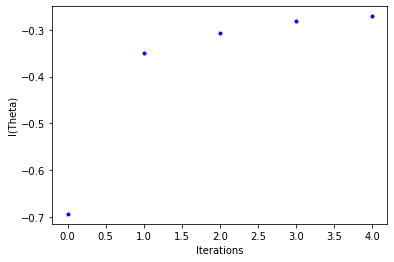

In [ ]:
# Plot the log likelihood values in the optimization iterations, in one of the two cases.
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history_cubic)),log_l_history_cubic,'b.')

### (b) Plot the computed non-linear boundary and discuss the questions



First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 3.

################# Do not write above this line #################

Your code here

$f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2$


In [ ]:
def boundary_function(x1_vec, x2_vec, theta_final):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
   
    if len(theta_final) == 6:
        # boundary function value for features up to quadratic
        c_0, c_1, c_2, c_3, c_4, c_5 = theta_final
       
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec*x1_vec + c_4*x2_vec*x2_vec + c_5*x1_vec*x2_vec 
    elif len(theta_final) == 10:
        # boundary function value for features up to cubic
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9 = theta_final
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec*x1_vec + c_4*x2_vec*x2_vec + c_5*x1_vec*x2_vec + c_6*x1_vec*x1_vec*x1_vec + c_7*x2_vec*x2_vec*x2_vec + c_8*x1_vec*x1_vec*x2_vec + c_9*x1_vec*x2_vec*x2_vec
    else:
        raise("Number of Parameters is not correct")
        
    return x1_vec, x2_vec, f

################# Do not write below this line #################

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

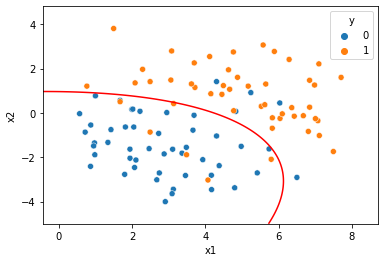

In [ ]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

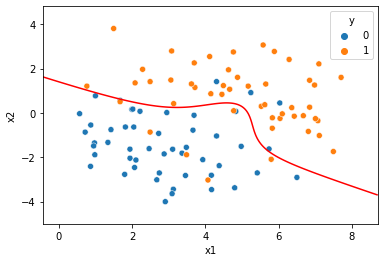

In [ ]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

################# Do not write above this line #################

Write now your considerations. Discuss in particular:
- What happens if you further increase the degree of the polynomial. How would the boundary change? Would you incur underfitting or overfitting?
- Look at the boundary of the quadratic and cubic polynomial features. Do they meet your expectations? Why? Consider in particular the classifier decision boundary in areas where there are fewer training data, i.e. where the classifier is supposed to generalize. Hint: Try changing the minimum and maximum limits in vectors x1_vec and x2_vec before plotting the boundaries.
- Look at the values of the original features, the 2nd and 3rd degree ones. Do you expect that normalizing the input features (either by setting their range to [-1,1] or by subtracting their mean and dividing by their standard deviation) would improve the classifier? Why yes or why not?

- The more  we raise the degree of the polynomia, the more the decision boundary will be accurate in dividing the target value of the training example. This means that increasing the degree we would incur in overfitting and the risk is to raise a decision boundary that can perfectly fit the training sample but it could not give the right prediction on new data.

- The decision boundary generated meet our expectations since they assume a particular shape (not linear) to divide the target values $y=0$ from the target values $y=1$. We can see a substantive difference between the linear, the quadratic and the cubic case, in particular paying attention to the areas with fewer data: the linear boundary has tendency to be more approximative in divinding the area in two regions while the non linear boundaries are more accurate.

- In general and also in our case, doing feature scaling so having each feature in the range $[-1,1]$ will make the classifier faster. This is due to the fact that, from the beginning, the gradient point to the maximum because the countour plot of the cost function is described by concentric circles. Applying mean normalization and standarization allows an additional improvement in the convergence.

################# Do not write below this line #################


## [10 points, extra, not compulsory] Question 4: Gaussian Discriminant Analysis



### (a) Review and implement classification with Gradient Discriminant Analysis (GDA)

Recall the assumptions for GDA

$\begin{aligned} y & \sim \operatorname{Bernoulli}(\phi) \\ x \mid y=0 & \sim \mathcal{N}\left(\mu_{0}, \Sigma\right) \\ x \mid y=1 & \sim \mathcal{N}\left(\mu_{1}, \Sigma\right) \end{aligned}$

Recall the probability distributions:

$\begin{aligned} p(y) &=\phi^{y}(1-\phi)^{1-y} \\ p(x \mid y=0) &=\frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{0}\right)^{T} \Sigma^{-1}\left(x-\mu_{0}\right)\right) \\ p(x \mid y=1) &=\frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{1}\right)^{T} \Sigma^{-1}\left(x-\mu_{1}\right)\right) \end{aligned}$

Overall, the parameters of the model are $\phi, \Sigma, \mu_{0}$ and $\mu_{1}$ and the log-likelihood is given by:

$\begin{aligned} \ell\left(\phi, \mu_{0}, \mu_{1}, \Sigma\right) &=\log \prod_{i=1}^{n} p\left(x^{(i)}, y^{(i)} ; \phi, \mu_{0}, \mu_{1}, \Sigma\right) \\ &=\log \prod_{i=1}^{n} p\left(x^{(i)} \mid y^{(i)} ; \mu_{0}, \mu_{1}, \Sigma\right) p\left(y^{(i)} ; \phi\right) \end{aligned}$

Parameters may be estimated by maximum likelihood estimate as follows:

$\begin{aligned} \phi &=\frac{1}{n} \sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\} \\ \mu_{0} &=\frac{\sum_{i=1}^{n} 1\left\{y^{(i)}=0\right\} x^{(i)}}{\sum_{i=1}^{n} 1\left\{y^{(i)}=0\right\}} \\ \mu_{1} &=\frac{\sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\} x^{(i)}}{\sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\}} \\ \Sigma &=\frac{1}{n} \sum_{i=1}^{n}\left(x^{(i)}-\mu_{y^{(i)}}\right)\left(x^{(i)}-\mu_{y^{(i)}}\right)^{T} \end{aligned}$

Consider the data variables as from the previous questions, x and y.
For this question, we would select features $x^{(i)}_1$ and $x^{(i)}_2$ into the new varible x12, dropping the $x_0=1$ convention.

# First extract the sole features x1 and x2 from x into an x12 array and reshape it to x2 vector arrays

In [ ]:
x12 = x[:,1:]
print(x[:5,:]) # For visualization of the first 5 values
print(x12[:5,:]) # For visualization of the first 5 values
print(y[:5]) # For visualization of the first 5 values

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[[ 1.3432504  -1.3311479 ]
 [ 1.8205529  -0.6346681 ]
 [ 0.98632067 -1.8885762 ]
 [ 1.9443734  -1.635452  ]
 [ 0.97673352 -1.3533151 ]]
[0 0 0 0 0]


Now code up the equations above to learn the GDA parameters from the training data.


################# Do not write above this line #################


Your code here

In [ ]:
def compute_phi(y):
    phi = 0
    for i in range(len(y)):
        if y[i]==1:
            phi +=1 
    return phi/len(y)
  


def compute_mu0(x, y):
    mu0 =  np.zeros(len(x[0]))
    den = 0
    for i in range(len(y)):
        if y[i]==0:
            mu0 += x[i] 
            den += 1
            
    return mu0/den



def compute_mu1(x, y):
    mu1 = np.zeros(len(x[0]))
    den = 0
    for i in range(len(y)):
        if y[i]==1:
            mu1 += x[i] 
            den += 1
            
    return mu1/den

def compute_sigma(x, y, mu0, mu1):
    sigma = np.zeros((len(x[0]),len(x[0])))    
    for i in range(len(y)):    
        if y[i]==0:
            #sigma +=(x[i]-mu0)@(np.matrix(x[i])-mu0).T 
            sigma[0][0] += (x[i][0]-mu0[0])*(x[i][0]-mu0[0])
            sigma[1][0] += (x[i][1]-mu0[1])*(x[i][0]-mu0[0])
            sigma[0][1] += (x[i][0]-mu0[0])*(x[i][1]-mu0[1])
            sigma[1][1] += (x[i][1]-mu0[1])*(x[i][1]-mu0[1])
        else:
            #sigma += (x[i]-mu1)@(np.matrix(x[i])-mu1).T 
            sigma[0][0] += (x[i][0]-mu1[0])*(x[i][0]-mu1[0])
            sigma[1][0] += (x[i][1]-mu1[1])*(x[i][0]-mu1[0])
            sigma[0][1] += (x[i][0]-mu1[0])*(x[i][1]-mu1[1])
            sigma[1][1] += (x[i][1]-mu1[1])*(x[i][1]-mu1[1])
    return sigma/len(y)


# computing p(x|y) for the Bayes rule
def p_x_given_y(x,mu,sigma):  
    #den = pow(2*np.pi, len(x)/2)*pow(np.linalg.norm(sigma), 0.5)
    den = pow(2*np.pi, len(x)/2)*pow(np.linalg.det(sigma), 0.5)
    p = np.exp( (-0.5) * ( (x-mu)@np.linalg.inv(sigma)@((x-mu).T) ) )
    return p/den



################# Do not write below this line #################


In [ ]:
# Support functions

# Function p(y) for applying the Bayes rule
def p_y(y,phi):
    if y==1: return phi
    else: return 1-phi

In [ ]:
# Now estimate the GDA parameters
phi = compute_phi(y)
mu0 = compute_mu0(x12,y)
mu1 = compute_mu1(x12,y)
sigma = compute_sigma(x12, y, mu0, mu1)

phi,mu0,mu1,sigma

(0.494949494949495,
 array([ 2.93068144, -1.44476469]),
 array([4.93616668, 0.76771897]),
 array([[ 2.68174521, -0.46404053],
        [-0.46404053,  1.88367821]]))

Now that we know both the distributions of $p(y)$ and $p(x|y)$, we may estimate the posterior probability for an input $x$ via Bayes Rule:

\begin{equation}
p(y \mid x)=\frac{p(x \mid y) p(y)}{p(x)}
\end{equation}
where $p(x)$ is the same for both classes and may be disregarded.

This is used to classify each data point, by comparing $p(y=1|x) \propto p(x \mid y=1) p(y=1)$ and $p(y=0|x) \propto p(x \mid y=0) p(y=0)$.

In [ ]:
selected_example=1
print('Selected example =', x12[selected_example,:])

# compute p(y=0|x) ~ p(x|y=0)*p(y=0)  &  p(y=1|x) ~ p(x|y=1)*p(y=1)

# y=0
print('p(y=0|x) ~', p_x_given_y(x12[selected_example,:],mu0,sigma)*p_y(0,phi))

# y=1
print('p(y=1|x) ~', p_x_given_y(x12[selected_example,:],mu1,sigma)*p_y(1,phi))

Selected example = [ 1.8205529 -0.6346681]
p(y=0|x) ~ 0.026129116841520316
p(y=1|x) ~ 0.0020617882761784934


### (b) Plot the estimated likelihood functions, the decision boundary and write your remarks


In [ ]:
def boundary_gda(x1_vec, x2_vec, mu0, mu1, sigma, phi):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    f=np.zeros(x1_vec.shape)
    
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            x12_ij = np.array( (x1_vec[i,j],x2_vec[i,j]) )
            f[i,j] = p_x_given_y(x12_ij,mu1,sigma)*p_y(1,phi) - p_x_given_y(x12_ij,mu0,sigma)*p_y(0,phi)
            
    return x1_vec, x2_vec, f


x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_gda(x1_vec, x2_vec, mu0, mu1, sigma, phi)

(-0.42920059, 8.705400599999999)

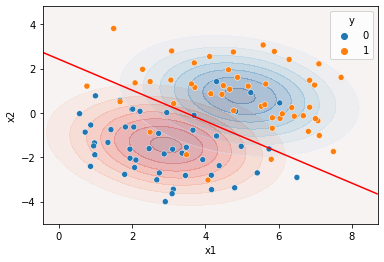

In [ ]:
from matplotlib import cm
from scipy.stats import multivariate_normal

# Define Gaussian pdfs
rv0 = multivariate_normal(mu0, sigma)
rv1 = multivariate_normal(mu1, sigma)

pairx12 = np.dstack((x1_vec, x2_vec))

# plot pdf contours
plt.contourf(x1_vec, x2_vec, rv0.pdf(pairx12),alpha=0.5,cmap=cm.Reds)
plt.contourf(x1_vec, x2_vec, rv1.pdf(pairx12),alpha=0.35,cmap=cm.Blues)

# Add the GDA classification to the plot
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);
plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

plt.ylim(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1)
plt.xlim(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1)

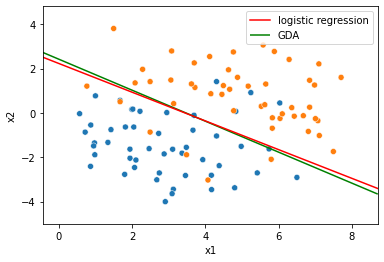

In [ ]:
# For comparison with the Logistic Regression boundary

# Generate vector to plot decision boundary
x1vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,2)

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl)

# Plot decision boundary
log, = plt.plot(x1vec,(-x1vec*theta_GA[1]-theta_GA[0])/theta_GA[2], color="red")
gda = plt.contour(x1_vec, x2_vec, f, colors="green", levels=[0])

plt.legend([log, gda.collections[0]],['logistic regression','GDA'])

plt.ylim(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1)
plt.xlim(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1)

# plt.legend()
plt.show()

Write now your considerations. Discuss in particular:
- Gaussian Discriminant Analysis makes stronger modelling assumptions than logistic regression. When may this be helpful and where may this be harmful?



- Gaussian Discriminant Analysis requests three strong assumptions: <br>
  1) $x | y=0 \sim N(\mu_0,\Sigma)$; <br>
  2) $x | y=1 \sim N(\mu_1,\Sigma)$; <br>
  3) $y \sim Ber(\phi)$; <br>
  So, under general, condition is helpful to use the logistic regression which makes weaker assumption, this choice is better in terms of memory and computation time since we need less traning data. It's helpful to use the GDA if the training set is distribuited according to a gaussian because the stronger assumptions are satisfied.

Credits for material: Andrew Ng, C. Combier